# Classify Lung Cancer

### Load Data

notebook by Royhan

In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [37]:


df = pd.read_csv("Data/lung-cancer-survey.csv")

df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [38]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [40]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [41]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<Axes: >

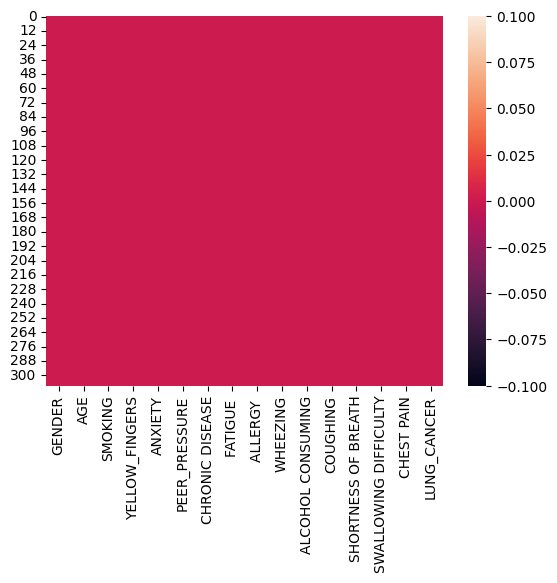

In [42]:
sns.heatmap(df.isnull())

In [43]:
df[df.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


In [44]:
df.drop_duplicates(inplace=True)

df[df.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER


In [45]:
len(df.columns)

16

In [46]:
df["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

In [47]:
df["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [48]:
label = {'NO':0, 'YES':1}
gender = {'M':1, 'F':2}

df["LUNG_CANCER"] = df["LUNG_CANCER"].apply(lambda x: label[x])
df["GENDER"] = df["GENDER"].apply(lambda x: gender[x])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


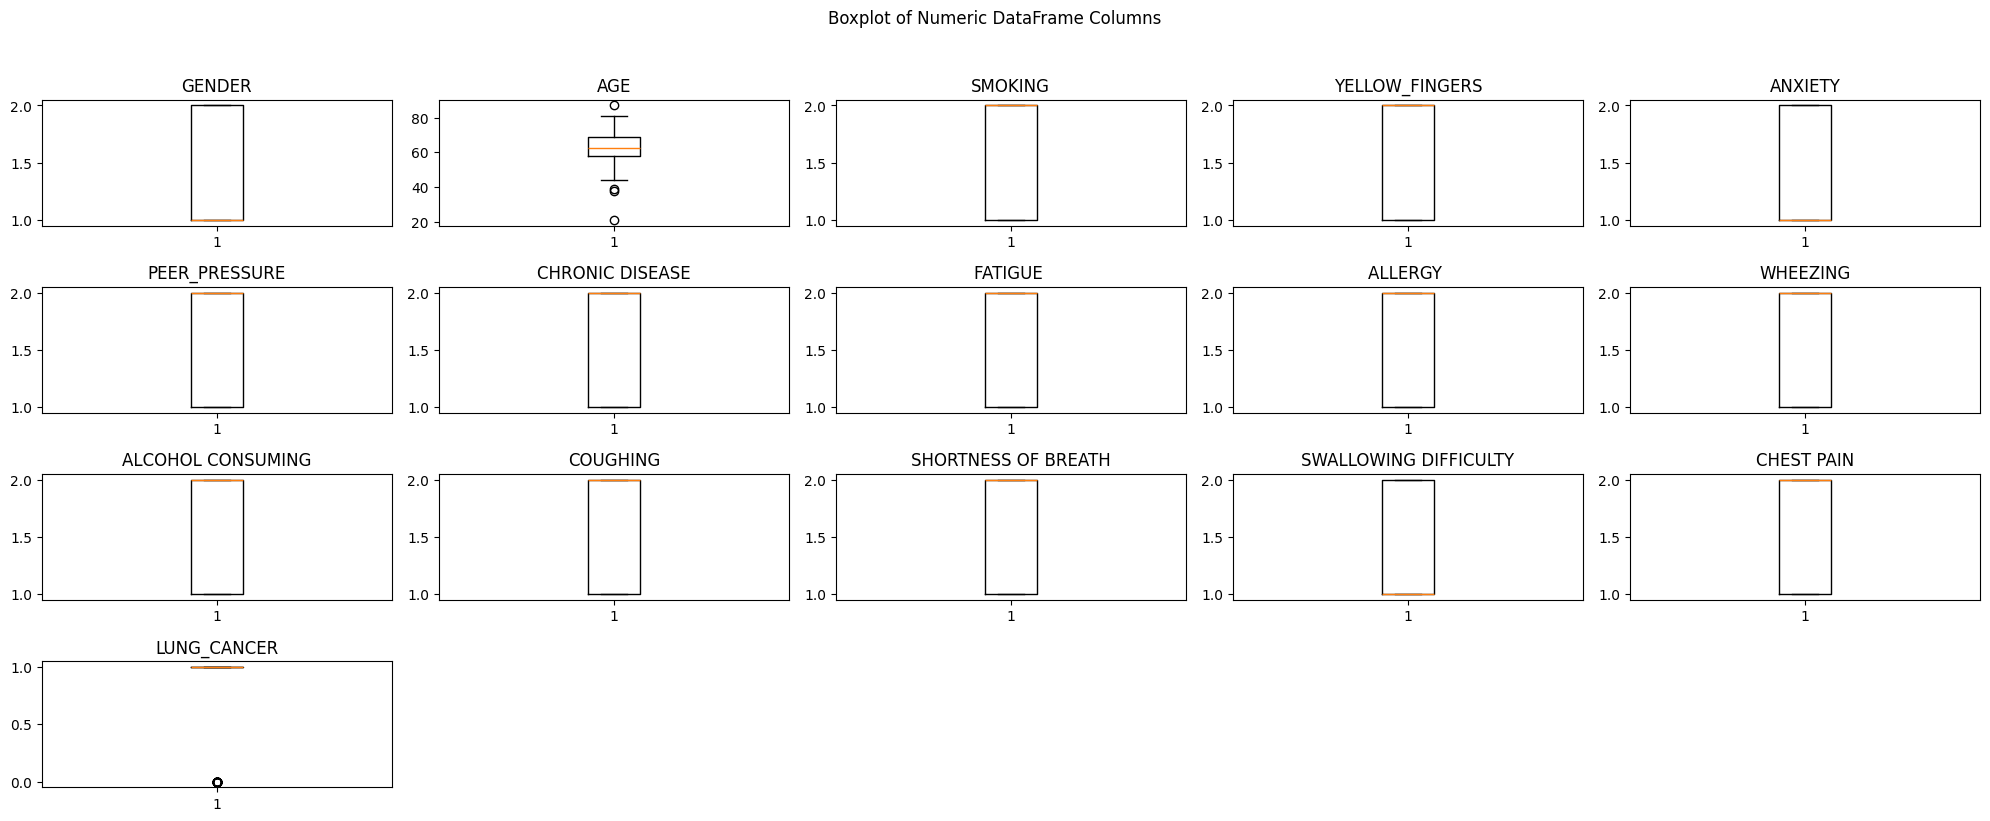

In [49]:
numeric_columns = df.select_dtypes(include='number').columns

fig, axs = plt.subplots(5, 5, figsize=(20, 10))

for i, col in enumerate(numeric_columns):
    row = i // 5  
    col_index = i % 5  
    axs[row, col_index].boxplot(df[col].dropna())  
    axs[row, col_index].set_title(col)

for j in range(i + 1, 25):
    fig.delaxes(axs[j // 5, j % 5])

plt.suptitle("Boxplot of Numeric DataFrame Columns")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


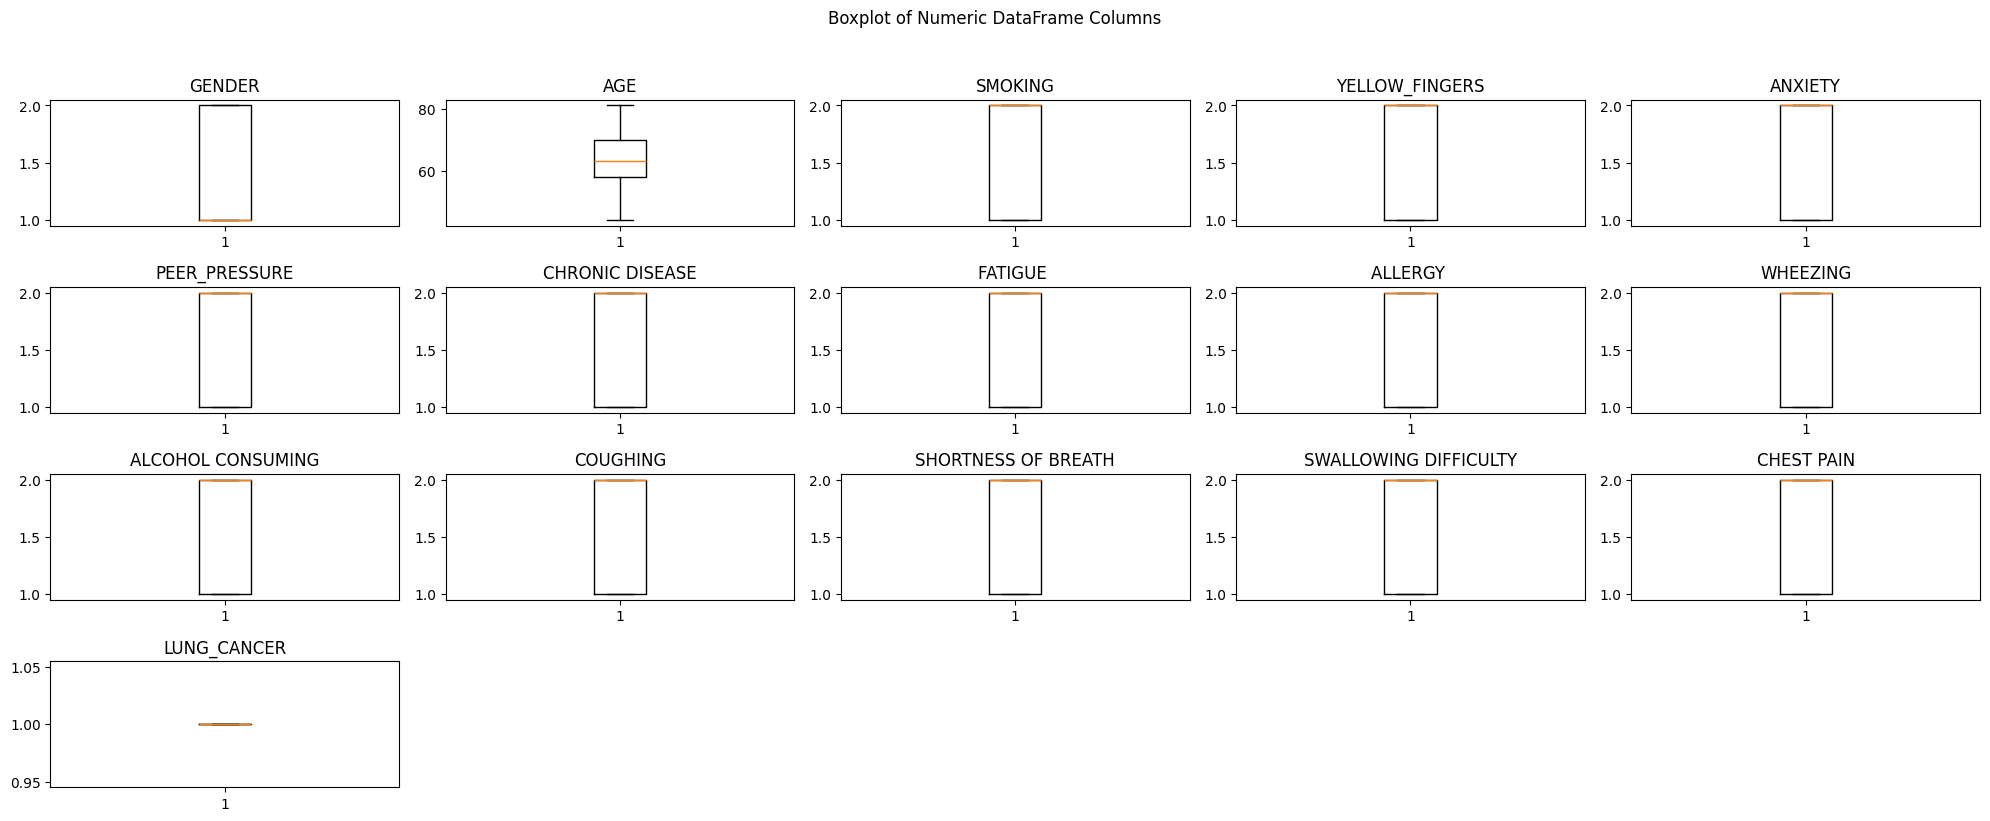

In [50]:
def remove_outliers_iqr(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)
    
    # Count the number of outliers removed
    num_outliers_removed = outliers.sum()
    
    # Filter DataFrame based on rows without outliers
    df_no_outliers = df[~outliers]
    
    return df_no_outliers

new_df = remove_outliers_iqr(df)
numeric_columns = new_df.select_dtypes(include='number').columns

fig, axs = plt.subplots(5, 5, figsize=(20, 10))

for i, col in enumerate(numeric_columns):
    row = i // 5  
    col_index = i % 5  
    axs[row, col_index].boxplot(new_df[col].dropna())  
    axs[row, col_index].set_title(col)

for j in range(i + 1, 25):
    fig.delaxes(axs[j // 5, j % 5])

plt.suptitle("Boxplot of Numeric DataFrame Columns")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [51]:
print(f"amount real data: {len(df)}, amount after outlier data: {len(new_df)}")

amount real data: 276, amount after outlier data: 236


data kategorikal = gender, 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


In [55]:
scaler = MinMaxScaler()

df["AGE"] = scaler.fit_transform(df[["AGE"]])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.727273,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,0.803030,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,0.575758,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,0.636364,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,2,0.636364,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [62]:
X = df.drop(columns='LUNG_CANCER')
y = df['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
248,2,0.651515,2,2,1,2,2,2,2,2,1,2,2,1,1
28,2,0.484848,2,2,2,1,2,1,1,2,2,1,2,2,2
155,1,0.818182,2,2,2,2,2,1,1,1,1,1,1,1,2
267,1,0.590909,2,2,2,2,2,1,2,1,2,1,1,2,2
5,2,0.818182,1,2,1,1,2,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2,0.424242,1,1,1,2,2,1,2,1,2,2,2,1,1
83,2,0.909091,1,1,1,2,2,1,2,1,2,2,2,1,1
17,1,0.545455,2,2,2,2,2,1,1,1,2,1,1,2,2
236,1,0.636364,1,2,1,2,1,2,2,2,2,2,2,1,2


In [63]:
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
bayesian = GaussianNB()
randomforest = RandomForestClassifier(random_state=42)
desiciontree = DecisionTreeClassifier(random_state=42)

knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
bayesian.fit(X_train, y_train)
randomforest.fit(X_train, y_train)
desiciontree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [67]:
k = 10

print("\nknn model:")
print(np.mean(cross_val_score(knn, X, y, cv=k, scoring='accuracy')))
print("\nsvm model:")
print(np.mean(cross_val_score(svm, X, y, cv=k, scoring='accuracy')))
print("\nnaive bayes model:")
print(np.mean(cross_val_score(bayesian, X, y, cv=k, scoring='accuracy')))
print("\nrandom forest model:")
print(np.mean(cross_val_score(randomforest, X, y, cv=k, scoring='accuracy')))
print("\ndesicion tree model:")
print(np.mean(cross_val_score(desiciontree, X, y, cv=k, scoring='accuracy')))


knn model:
0.8875661375661377

svm model:
0.8984126984126984

naive bayes model:
0.890873015873016

random forest model:
0.9022486772486772

desicion tree model:
0.8362433862433865


In [68]:
knn_predict = knn.predict(X_test)
svm_predict = svm.predict(X_test)
bayesian_predict = bayesian.predict(X_test)
randomforest_predict = randomforest.predict(X_test)
desiciontree_predict = desiciontree.predict(X_test)

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

def get_metrics(y_test, y_pred, model_name):
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1_score = report["macro avg"]["f1-score"]

    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1_score)

get_metrics(y_test, knn_predict, "KNN")
get_metrics(y_test, svm_predict, "SVM")
get_metrics(y_test, bayesian_predict, "Naive Bayes")
get_metrics(y_test, randomforest_predict, "Random Forest")
get_metrics(y_test, desiciontree_predict, "Decision Tree")

results_df = pd.DataFrame(results)

results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.928571,0.836735,0.836735,0.836735
1,SVM,0.928571,0.836735,0.836735,0.836735
2,Naive Bayes,0.928571,0.836735,0.836735,0.836735
3,Random Forest,0.928571,0.836735,0.836735,0.836735
4,Decision Tree,0.875000,0.728261,0.806122,0.757276


In [69]:
results_df.Model.to_list()

['KNN', 'SVM', 'Naive Bayes', 'Random Forest', 'Decision Tree']

In [72]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}


grid_search = GridSearchCV(estimator=bayesian, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'var_smoothing': 1e-09}
Best score: 0.8636363636363636


In [73]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=desiciontree, param_grid=param_grid, cv=k, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8818181818181818


In [74]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],          
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['linear', 'rbf', 'poly']     
}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')  

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best cross-validation score:  0.9227272727272726


In [75]:
model = SVC(C=0.1, gamma=0.1, kernel='poly')


model.fit(X_train, y_train)

predict = model.predict(X_test)

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.96      0.96      0.96        49

    accuracy                           0.93        56
   macro avg       0.84      0.84      0.84        56
weighted avg       0.93      0.93      0.93        56



In [76]:
joblib.dump(model, 'Model/lung_cancer_prediction.pkl')
print("Model telah disimpan ke file 'Model/lung_cancer_prediction.pkl'.")

Model telah disimpan ke file 'Model/lung_cancer_prediction.pkl'.
